In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

pyplot.subplot(211)
pyplot.hist(X[:, 0])
pyplot.subplot(212)
pyplot.hist(X[:, 1])
pyplot.show()

In [ ]:
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.002, Test: 0.004


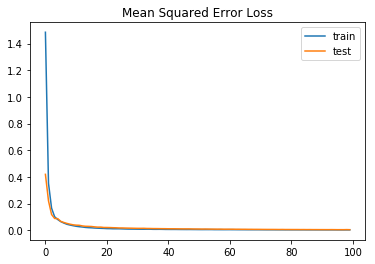

In [12]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

scaler = StandardScaler()
scaler.fit(trainy)
trainy = scaler.transform(trainy)
testy = scaler.transform(testy)

model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

pyplot.title('Mean Squared Error Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

>0.001
>0.016
>0.012
>0.007
>0.001
>0.005
>0.009
>0.009
>0.006
>0.000
>0.011
>0.010
>0.008
>0.010
>0.012
>0.010
>0.006
>0.003
>0.012
>0.004
>0.009
>0.002
>0.012
>0.006
>0.011
>0.009
>0.005
>0.010
>0.006
>0.014
>0.000
>0.000
>0.001
>0.001
>0.001
>0.001
>0.001
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.001
>0.001
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.001
>0.000
>0.000
>0.001
>0.003
>0.010
>0.007
>0.012
>0.008
>0.003
>0.008
>0.004
>0.001
>0.009
>0.006
>0.006
>0.006
>0.008
>0.004
>0.008
>0.003
>0.006
>0.002
>0.008
>0.008
>0.004
>0.003
>0.014
>0.003
>0.005
>0.005
>0.008
>0.001
>0.011
Unscaled: 0.008 (0.004)
Normalized: 0.000 (0.000)
Standardized: 0.006 (0.003)


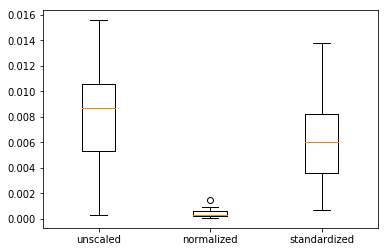

In [2]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std


def get_dataset(input_scaler, output_scaler):
	X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	if input_scaler is not None:
		input_scaler.fit(trainX)
		trainX = input_scaler.transform(trainX)
		testX = input_scaler.transform(testX)
	if output_scaler is not None:
		trainy = trainy.reshape(len(trainy), 1)
		testy = testy.reshape(len(trainy), 1)
		output_scaler.fit(trainy)
		trainy = output_scaler.transform(trainy)
		testy = output_scaler.transform(testy)
	return trainX, trainy, testX, testy

def evaluate_model(trainX, trainy, testX, testy):
	model = Sequential()
	model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='linear'))
	model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
	model.fit(trainX, trainy, epochs=100, verbose=0)
	test_mse = model.evaluate(testX, testy, verbose=0)
	return test_mse


def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
	trainX, trainy, testX, testy = get_dataset(input_scaler, output_scaler)
	results = list()
	for _ in range(n_repeats):
		test_mse = evaluate_model(trainX, trainy, testX, testy)
		print('>%.3f' % test_mse)
		results.append(test_mse)
	return results


results_unscaled_inputs = repeated_evaluation(None, StandardScaler())
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())

print('Unscaled: %.3f (%.3f)' % (mean(results_unscaled_inputs), std(results_unscaled_inputs)))
print('Normalized: %.3f (%.3f)' % (mean(results_normalized_inputs), std(results_normalized_inputs)))
print('Standardized: %.3f (%.3f)' % (mean(results_standardized_inputs), std(results_standardized_inputs)))

results = [results_unscaled_inputs, results_normalized_inputs, results_standardized_inputs]
labels = ['unscaled', 'normalized', 'standardized']
pyplot.boxplot(results, labels=labels)
pyplot.show()